# Explore here

In [1]:
# Your code here
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# modelado
from sklearn.model_selection import train_test_split
# escalado
from sklearn.preprocessing import StandardScaler
# encoding
from sklearn.preprocessing import OneHotEncoder


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split



## Import Data Set y mirar el data set las primeras 10 filas para ver mas o menos el contenido. 


In [290]:

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Ver tamaño de la tabla 

In [291]:

df.shape

(48895, 16)

## Ver tipo de datos y valores no nulos 

In [292]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

 Podemos ver que en este data set hay 48895 filas y 16 columnas entre 3 datos numericos con desimales y 7 datos numericos sin desimales asi como 6 categorias.

 La variable last_review debe tener 1052 valores nulos al igual que la variable reviews_per_month 

 Las demas valores se aprecian que no tienen valores nulos

Tambien la variable hostd_id, host_name y name tienen valores nulos. 

## 2. Preparacion y limpieza de Datos 

- Contar filas  duplicadas. 

In [293]:

df.duplicated().sum 

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool>

- El conteo es 0 por lo cual me esta diciendo que no hay filas duplicadas 

# Paso 2: Eliminar datos irrelevantes los cuales nuestro algoritmo no va a tomar patrones de ellos. 

In [294]:

df.drop(['id','name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood'], axis= 1, inplace=True)

In [295]:


print(f"Luego de eliminar las columnas que son irrelevantes este es el tamano actual del df {df.shape}")

Luego de eliminar las columnas que son irrelevantes este es el tamano actual del df (48895, 9)


# Contaremos los NaN por columna 

In [296]:

df.isnull().sum()
 

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- No se aprecia ningun valor nulo , se entiende que al borrar en este caso los datos irrelevantes que tenian valores nulo se fueron con ellos jeje

# Paso 3 

 - Analisis Univariante 

In [297]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


# -Análisis sobre variables categoricas 

In [298]:

df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [299]:
df.room_type.value_counts()


room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

-Dentro de la variable tenemos 3 tipos de habitaciones las cuales tienen una cantidad de datos y la shared room tiene menos datos pero igualmente 
no genera ningun problema 

- Ahora realizamos un grafico de barra 

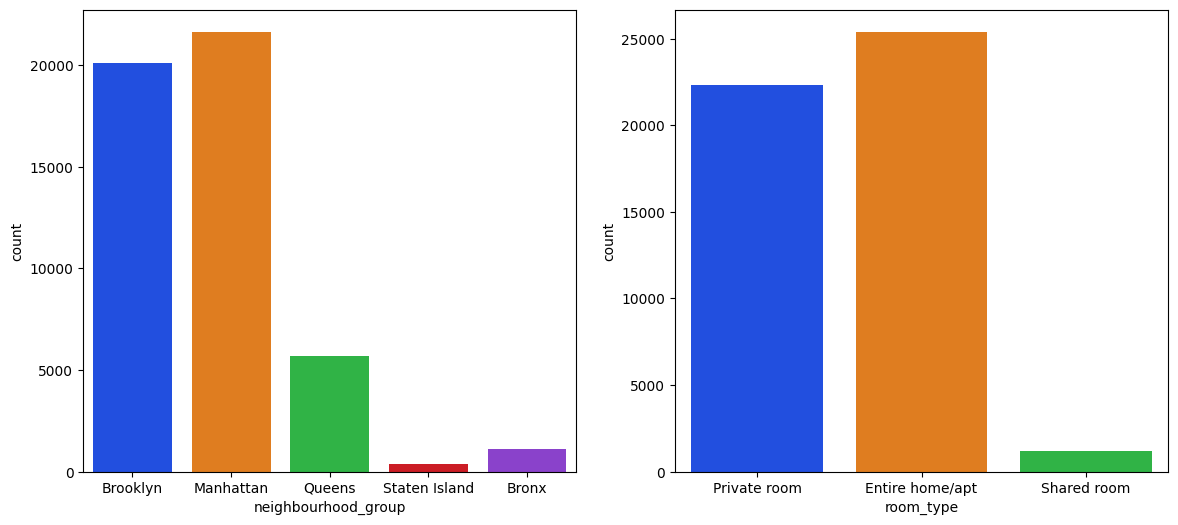

In [300]:

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize = (14, 6))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", palette='bright', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df, x = "room_type", palette='bright', hue= "room_type", legend=False)

plt.show()


- En el grafico 1 podemos interpretar que hay una mayor rango de distribusion de anuncios de alquiler en la zona de manhattan y brooflyn que las otras 3 barrios. 

- En el grafico 2 se ve que comparten pisos en comparacion a personas que tienen casa propia o piso propio y se observa una pequeña diferencia de personas
que tienen piso propio a las que alquilan piso.

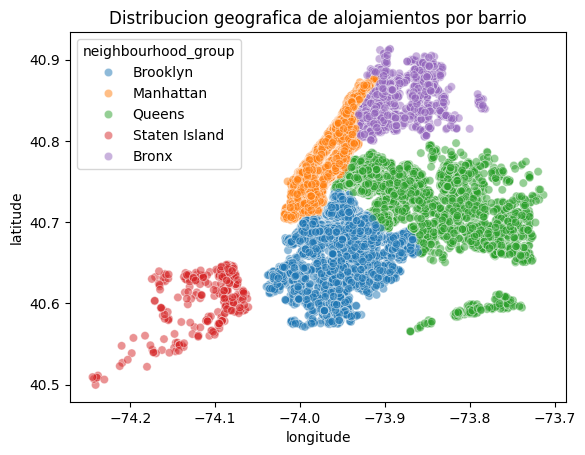

In [301]:
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group', alpha=0.5)
plt.title("Distribucion geografica de alojamientos por barrio")
plt.show()

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


# -Análisis sobre variables numericas (histograma o diagramas de caja)

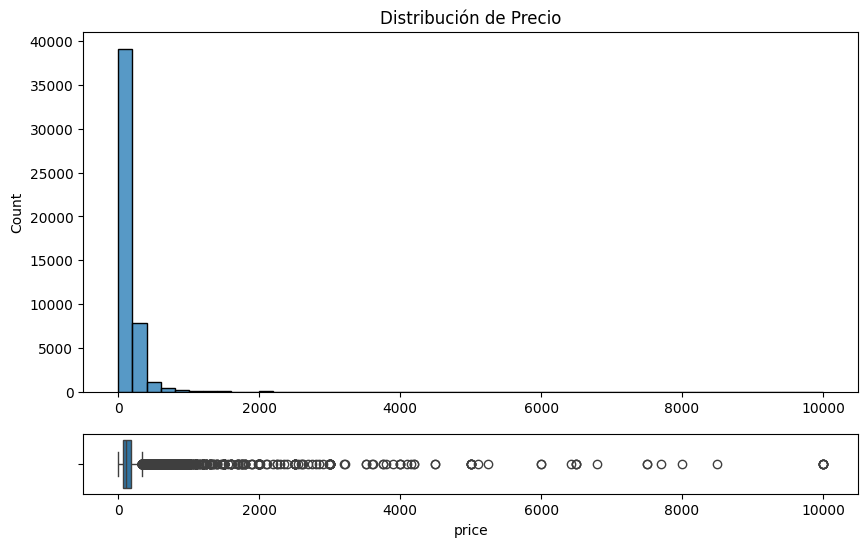

In [303]:

fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "price", bins=50).set(title='Distribución de Precio', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "price")
plt.show()

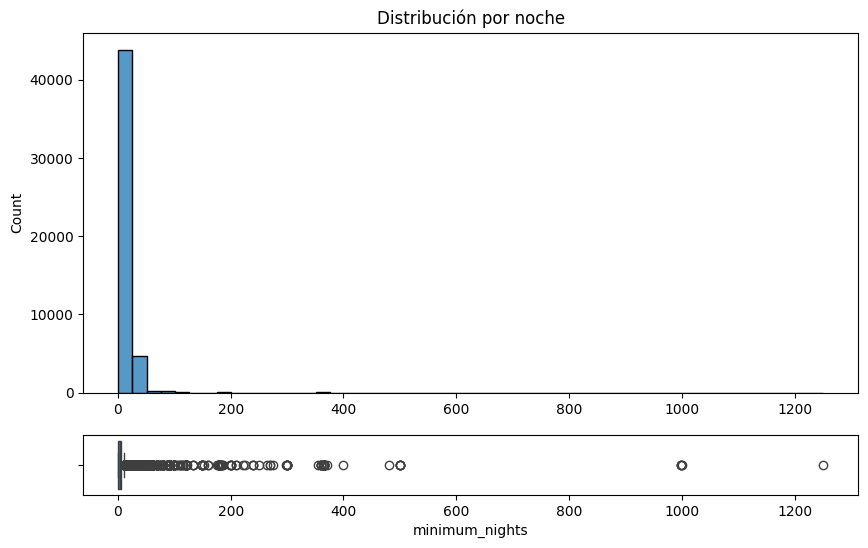

In [304]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "minimum_nights", bins=50).set(title='Distribución por noche', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "minimum_nights")
plt.show()


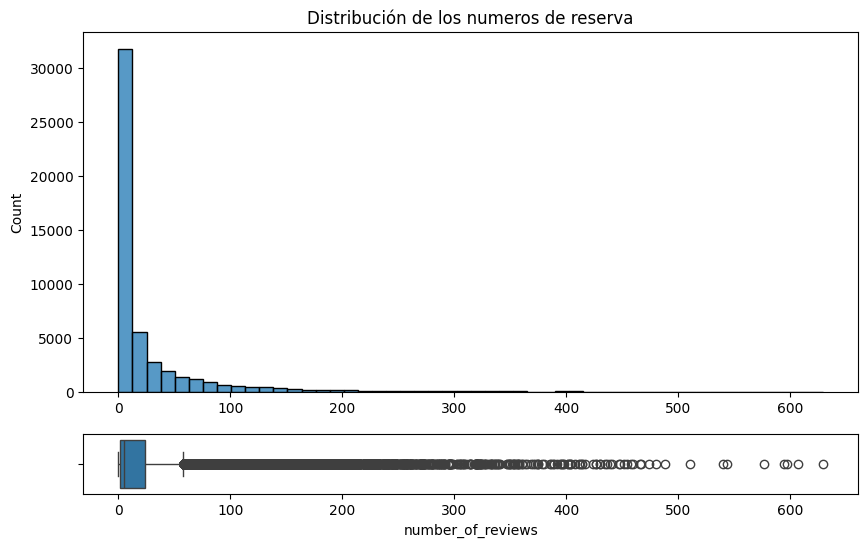

In [305]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "number_of_reviews", bins=50).set(title='Distribución de los numeros de reserva', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "number_of_reviews")
plt.show()

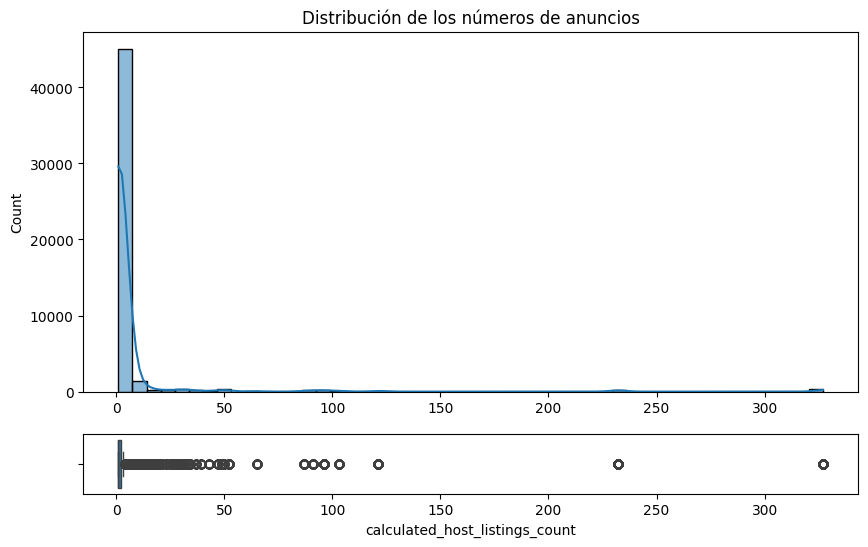

In [306]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "calculated_host_listings_count", bins=50, kde=True).set(title='Distribución de los números de anuncios', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "calculated_host_listings_count")
plt.show()

<Axes: xlabel='availability_365'>

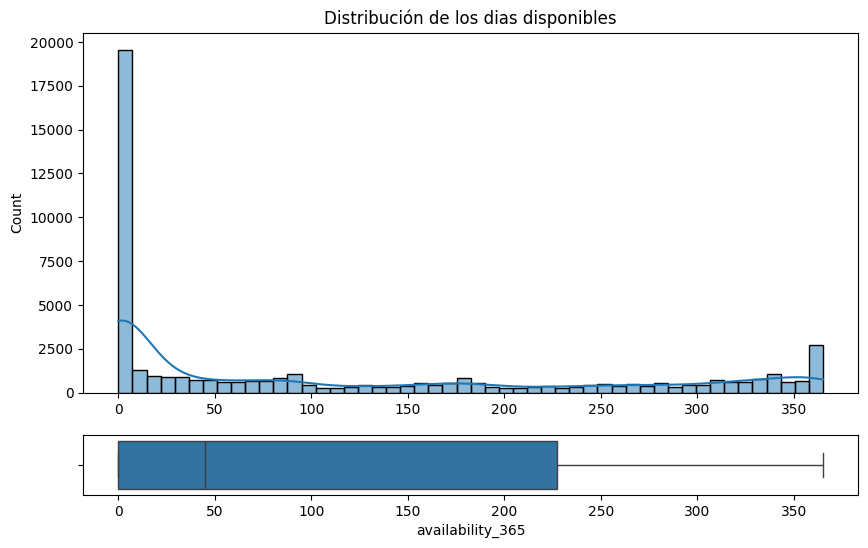

In [307]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "availability_365", bins=50, kde=True).set(title='Distribución de los dias disponibles', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "availability_365")

[Text(0.5, 1.0, 'Ver outliers en Latitud')]

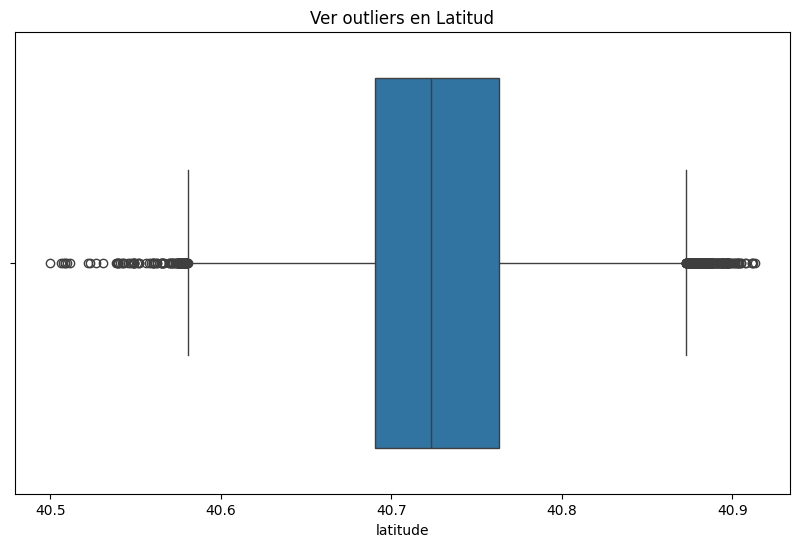

In [308]:
# Analisis sobre variables float(con decimales)

# En este caso utilizaremos solo el grafico de boxplot

fig, axis = plt.subplots(1, 1, figsize = (10, 6))
sns.boxplot(ax = axis, data = df, x = "latitude").set(title='Ver outliers en Latitud')

[Text(0.5, 1.0, 'Ver outliers en Longitude')]

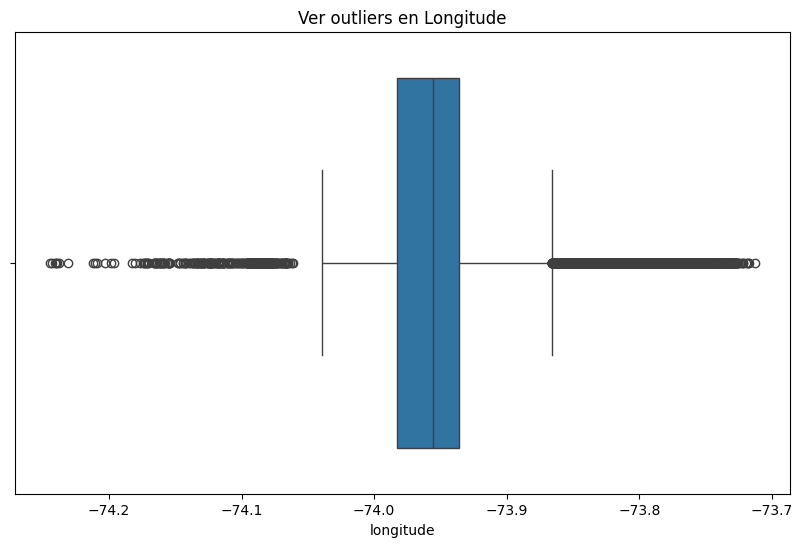

In [309]:
fig, axis = plt.subplots(1, 1, figsize = (10, 6))
sns.boxplot(ax = axis, data = df, x = "longitude").set(title='Ver outliers en Longitude')

# Paso 4 
# Análisis Multivariante (Relacionar las variables entre ellas)

- Nuestra variable a relacionar sera el precio y tenemos que relacionarlo con las categoricas y numericas para ver que relacion tienen con el fin de 
darle mejores pistas a nuestro modelo. 

# Correlacion multivariante categorica vs numerica 

-Precio - ( neighbourhood_group - room_type) - Diagrama de cajas 

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_14692\1169146070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')


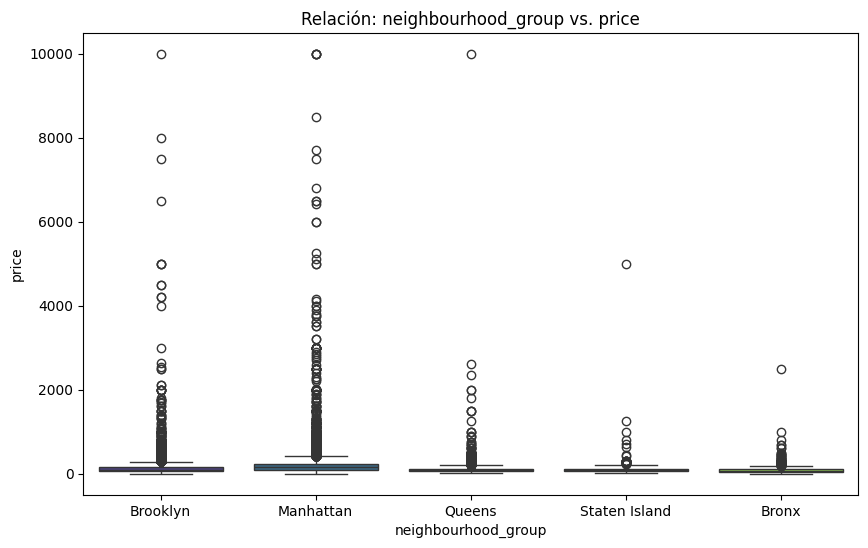

In [310]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')
plt.title('Relación: neighbourhood_group vs. price')
plt.show()


C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_14692\4029881041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='pastel')


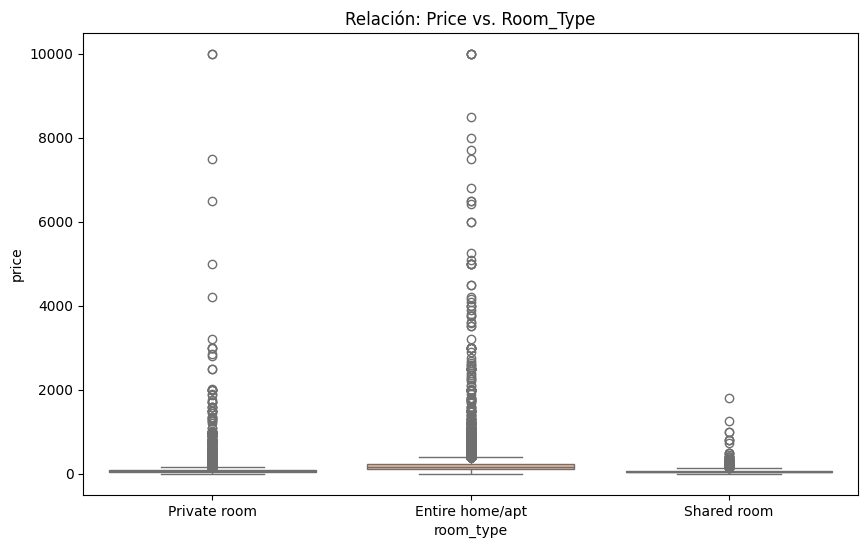

In [311]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='pastel')
plt.title('Relación: Price vs. Room_Type')
plt.show()

# Númerica vs Númerica , importnate hay que sacar la matriz de correlacion entre las variables antes de graficar con el objetivo de predecir 

 - Paso 1: Creo una lista donde voy a meter las variables a relacionar 
 - Paso 2: Hacemos la matriz de correlacion utilizando la funcion .corr()
 - Paso 3: realizamos el mapa de calor que nos dira que relacion hay o no 

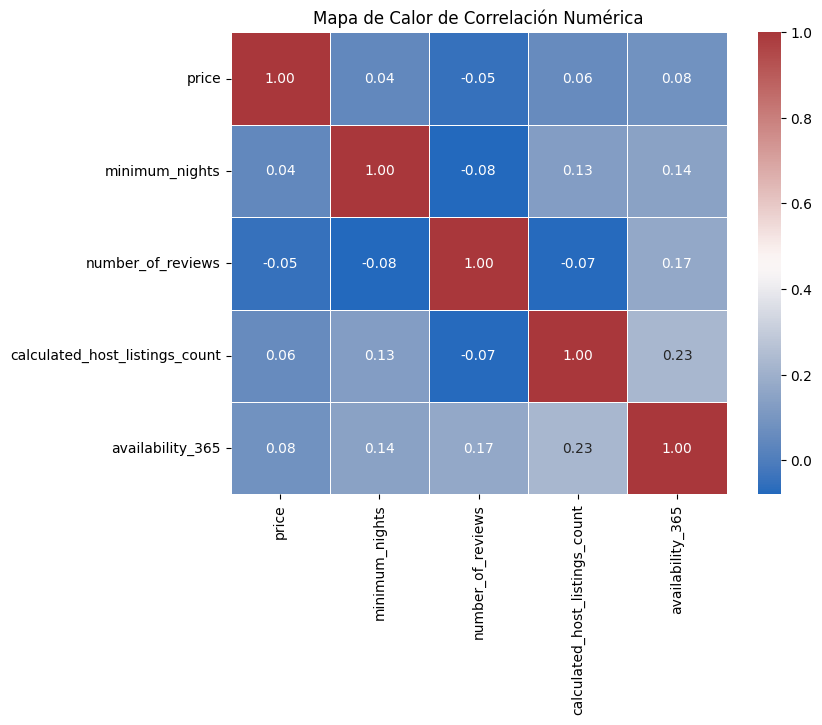

In [312]:

variables_relacion = ['price', 'minimum_nights', 'number_of_reviews', 
    'calculated_host_listings_count', 'availability_365']

matriz_correlacion = df[variables_relacion].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True,fmt=".2f",cmap='vlag',linewidths=.5)
plt.title('Mapa de Calor de Correlación Numérica')
plt.show()


# Paso 5 
 - Ojo, recuerda : El Factor 1.5: Es un valor convencional establecido por el estadístico John Tukey.
 - Nos permite ser lo suficientemente estrictos para atrapar los extremos, sin eliminar la mayoría de los datos.
 - El 25% y el 75% son parte de una regla estadistica estandar para definir la normalidad de mis datos y por lo cual los ourliers 
 - Eliminacion de valores Atípicos.  


- Limpieza de Price 
  - Vamos a poner un parametro para definir la normalidad de mis datos 
  -  Eliminiacion de Outliers: 

In [313]:

Q1_precio = df['price'].quantile(0.25)
Q3_precio = df['price'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

limite_precio_superior = Q3_precio + 1.5 * IQR_precio
limite_precio_inferior = Q3_precio - 1.5 * IQR_precio
print(round(limite_precio_superior, 2),round(limite_precio_inferior,2))

df = df[(df['price'] <= limite_precio_superior) & (df['price'] >= limite_precio_inferior)]
df


334.0 16.0


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


- Eliminacion de outliers minimum_nights 
  - Cualquier noche superior a este filtro se concidera un outiers y sera eliminado. 
  -  Eliminiacion de Outliers

In [314]:

Q1_precio = df['minimum_nights'].quantile(0.25)
Q3_precio = df['minimum_nights'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

limite_minimum_nights_superior = Q3_precio + 1.5 * IQR_precio

df = df[df['minimum_nights'] <= limite_minimum_nights_superior ]
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


# Paso 6
 - Teniendo en cuenta que los datos sacados de airbnb no traen ningun NaN NO necesario hacer un manejo de valores faltantes 

# #Paso 7

 - Ingenieria de atributos. 
 -Debido a availability_365 con la finalidad de que le de al modelo respuestas mas simple por ejemplo si o no. 

In [ ]:
df["disponible"] = (df["availability_365"] > 0).astype(int)
print(df["disponible"])


0        1
1        1
2        1
3        1
4        0
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: disponible, Length: 39701, dtype: int64


C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_14692\693630953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["disponible"] = (df["availability_365"] > 0).astype(int)


## Paso 8 

- Division de datos 
   -  Aqui una ves que ya temos el data set limpio ( lo que se pudo :)) y una columna nueva creada en la varibale de atributos llego la hora de dividir el
      modelo uno para que se entrene(trin) y otro para que se evaulue(split)
   -   Agrupamos todas las columnas menos el precio. 
   
- Recuerda que el o.2 es el 20% que quermos utilizar para que aplique a la prueba 
 ramdom_ estate, nos garantiza que la aleatoriedad de la prueba sea la misma 

In [316]:

X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_value, y_train, y_value = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,disponible
44270,Queens,40.75023,-73.87772,Shared room,1,4,2,355,1
43224,Manhattan,40.74535,-73.97640,Entire home/apt,2,6,1,0,0
477,Manhattan,40.77886,-73.98042,Entire home/apt,2,129,1,14,1
9560,Manhattan,40.72168,-73.98418,Entire home/apt,7,2,1,0,0
17827,Brooklyn,40.69647,-73.92474,Entire home/apt,3,102,1,31,1


## Paso 9 

 - Codificacion tenemos que pasar los datos a numeros para que el modelo los entienda ya que el no entiende de palabras. 
 - En este caso vamos a utilizar la tenica one - hot encoding

- Aqui le estamos diciendo que aprenda con todos los datos de entrenamiento 
entreno el encoder con los datos de entrenamiento : 
 onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
 onehot_encoder.fit(X_train[variables_cambiar])
- En la primera parte de transforman las palabras a numeros que se aprendio en el .fit() y Le indicas que solo quieres transformar las columnas que contienen palabras : 
   X_matriz_de_numeros_train = onehot_encoder.transform(X_train[variables_cambiar])
   X_convertir_objetos_en_pandas = pd.DataFrame(X_matriz_de_numeros_train, index = X_train.index, columns=onehot_encoder.get_feature_names_out(variables_cambiar))



In [317]:

variables_cambiar = ["neighbourhood_group", "room_type"]

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoder.fit(X_train[variables_cambiar])

X_matriz_de_numeros_train = onehot_encoder.transform(X_train[variables_cambiar])
X_convertir_objetos_en_pandas = pd.DataFrame(X_matriz_de_numeros_train, index = X_train.index, columns=onehot_encoder.get_feature_names_out(variables_cambiar))

X_matriz_de_numeros_value = onehot_encoder.transform(X_value[variables_cambiar])
X_value_codificado = pd.DataFrame(X_matriz_de_numeros_value, index = X_value.index, columns=onehot_encoder.get_feature_names_out(variables_cambiar))

X_convertir_objetos_en_pandas.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
44270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43224,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
477,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9560,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17827,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Paso 10 
 - #Escalado 

  - El metodo de escalado a utilizar es StandarScaler ya que es el que mas se adapta a mi modelo. 
  - Instancio el escalador:
scaler = StandardScaler()
  - Aprende las reglas de  media y la desviacion usando los datos de x_train:
scaler.fit(X_train[variables_a_escalar]) 
  - Aplica las reglas de la media y la desviacion que aprendio anteriormente y las aplica x_entreno para escalarlos: 
X_escalado_xtrain = scaler.transform(X_train[variables_a_escalar])
  - #Remplazamos las columnas nuevas por las viejas:
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = variables_a_escalar)

In [318]:

variables_a_escalar = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "disponible"]

scaler = StandardScaler()
scaler.fit(X_train[variables_a_escalar])

X_escalado_xtrain = scaler.transform(X_train[variables_a_escalar])
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = variables_a_escalar)

X_escalado_x_value = scaler.transform(X_value[variables_a_escalar])
X_value_escalado_entreno = pd.DataFrame(X_escalado_x_value, index = X_value.index, columns = variables_a_escalar)

X_panda_escalado_entreno.head()


,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,disponible
44270,0.400785,1.484399,-0.911305,-0.469965,-0.055753,0.807847
43224,0.314092,-0.571141,-0.375263,-0.428147,-0.105574,-1.237858
477,0.909398,-0.654879,-0.375263,2.143665,-0.105574,0.807847
9560,-0.106406,-0.733201,2.304946,-0.511783,-0.105574,-1.237858
17827,-0.554262,0.504956,0.160779,1.579121,-0.105574,0.807847


## Combinación final de datos 



In [319]:
X_train_final = pd.concat([X_convertir_objetos_en_pandas, X_panda_escalado_entreno], axis=1)
X_value_final = pd.concat([X_value_codificado, X_value_escalado_entreno], axis=1)